<a href="https://colab.research.google.com/github/nrchakradhar/Notes/blob/master/Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Hello World\n")

!python --version
!pip install diagrams

Hello World

Python 3.6.9
     |████████████████████████████████| 15.2MB 46.6MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=f0bfa667c13b434c8afb27e13ecce4cd7383082d8e5462caa99227aa4eae2d8e
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [27]:
from diagrams import Diagram
from diagrams.k8s.clusterconfig import HPA
from diagrams.k8s.compute import Deployment, Pod, ReplicaSet
from diagrams.k8s.network import Ingress, Service
from diagrams.onprem.container import Docker

with Diagram("Exposed Pod with 3 Replicas", show=False):
    net = Ingress("domain.com") >> Service("svc")
    d1 = Docker("d1")
    net >> [Pod("pod1"),
            Pod("pod2"),
            Pod("pod3")] << ReplicaSet("rs") << Deployment("dp")
    

In [17]:
!pwd

/content


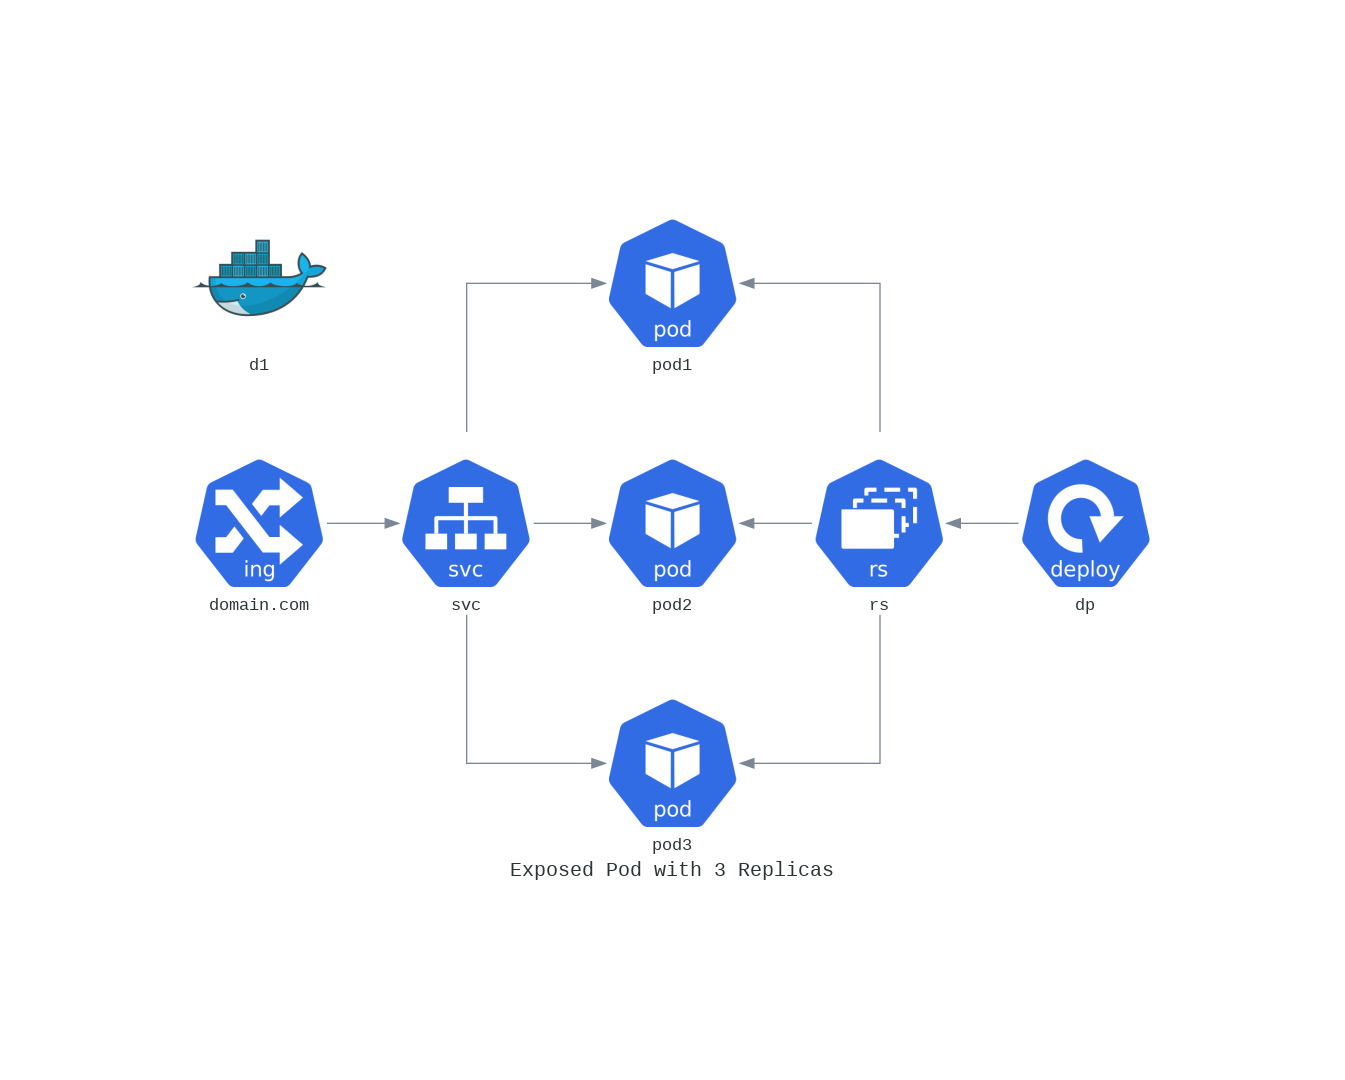

In [28]:
from IPython.display import Image
Image('/content/exposed_pod_with_3_replicas.png')

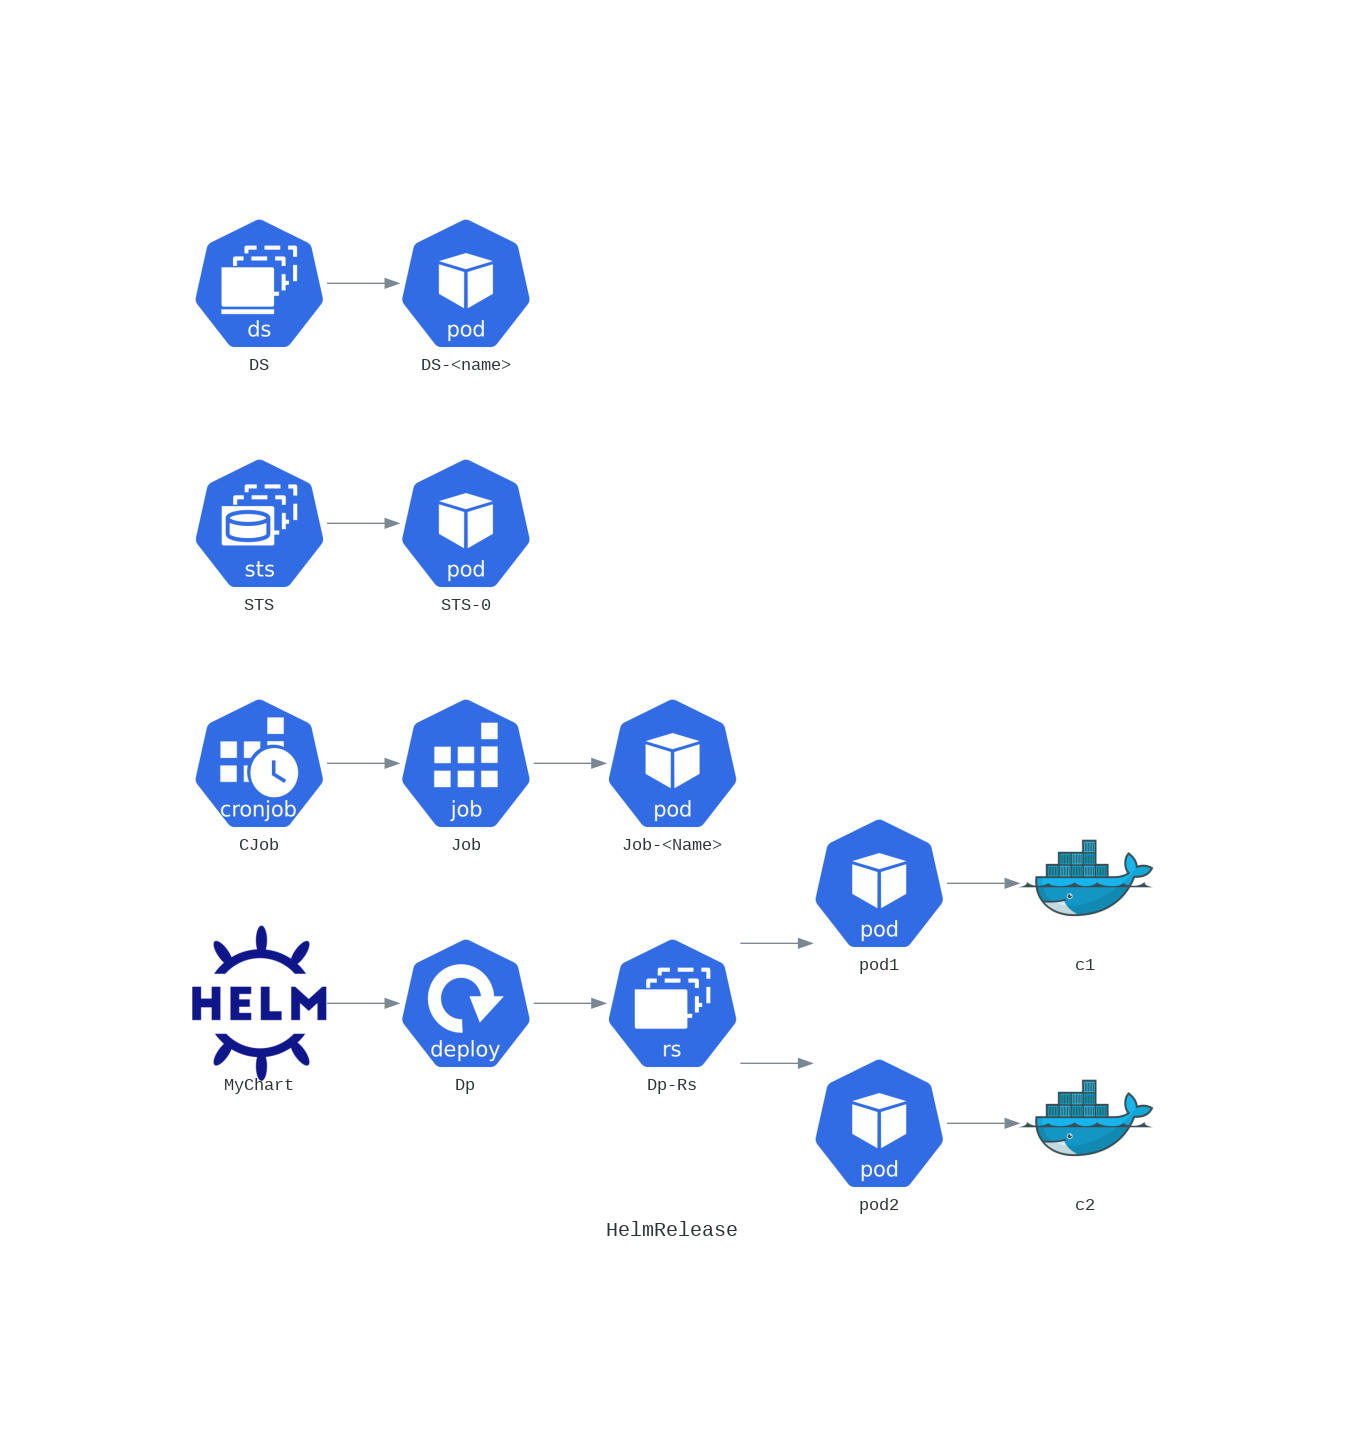

In [3]:
from diagrams import Diagram
from diagrams.k8s.ecosystem import Helm
from diagrams.k8s.compute import Deployment, Pod, ReplicaSet, DaemonSet, Job, StatefulSet, Cronjob
from diagrams.k8s.network import Ingress, Service
from diagrams.onprem.container import Docker

with Diagram("HelmRelease", show=False):
    c1 = Docker("c1")
    p1 = Pod("pod1")
    c2 = Docker("c2")
    p2 = Pod("pod2")
    p1 >> c1
    p2 >> c2
    Helm("MyChart") >> Deployment("Dp") >> ReplicaSet("Dp-Rs") >> [p1, p2]
    Cronjob("CJob") >> Job("Job") >> Pod("Job-<Name>")
    StatefulSet("STS") >> Pod("STS-0")
    DaemonSet("DS") >> Pod("DS-<name>")

from IPython.display import Image
Image('/content/helmrelease.png')